In [1]:
from __future__ import print_function
import argparse
import chainer
import chainer.links as L
from chainer.serializers import load_npz
from train_mnist import MLP
import numpy as np
from chainer import cuda

In [2]:
gpu=-1 # もしGPUを利用できる場合は 0 
unit=1000 #隠れ層のユニット数
batchsize=1024 #ミニバッチサイズ

# MNIST画像の読み込み

In [3]:
_, test = chainer.datasets.get_mnist()
x,t = test._datasets

# 学習済みモデルの読み込み

In [4]:
filename='result/model' 
model = MLP(unit, 10)
if gpu >= 0:
    # Make a specified GPU current
    chainer.cuda.get_device_from_id(gpu).use()
    model.to_gpu()  # Copy the model to the GPU
load_npz(filename, model)

# データをニューラルネットワークに入力し出力を得る<br>(Forward propagation)

In [5]:
x_dnn=np.empty([0, 10])
for i in range(0,len(x),batchsize):
    x_batch = x[i:i+batchsize]
    if gpu >= 0:
        x_batch = Variable(cuda.to_gpu(x_batch))
    x_dnn = np.r_[x_dnn, cuda.to_cpu(model(x_batch).data)] #model(x_batch).to_cpu().data]

# 結果を可視化する
<bf>t-SNEという手法を用いて２次元に圧縮し表示する<br>
ただし全部をプロットすると計算が大変なので１０００個のみ表示

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## 元の画像の2次元プロット
<br>（各プロットが１枚の画像を表し色がクラス（数字番号）を示す）

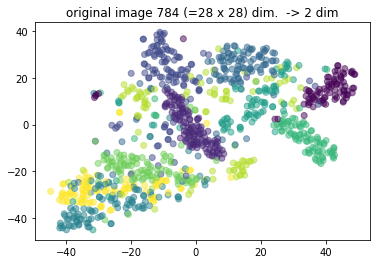

In [8]:
x_tsn= TSNE(n_components=2).fit_transform(x[:1000])
plt.scatter(x_tsn[:1000,0], x_tsn[:1000,1],c=t[:1000], alpha=0.5)
plt.title('original image 784 (=28 x 28) dim.  -> 2 dim')
plt.show()

## ニューラルネットワークの出力（１０次元）の２次元プロット

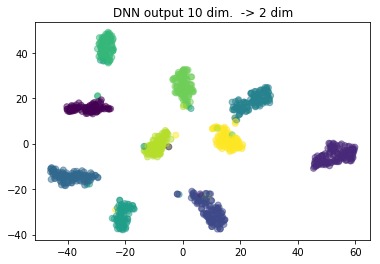

In [9]:
x_tsn= TSNE(n_components=2).fit_transform(x_dnn[:1000])
plt.scatter(x_tsn[:1000,0], x_tsn[:1000,1],c=t[:1000], alpha=0.5)
plt.title('DNN output 10 dim.  -> 2 dim')
plt.show()

## 学習曲線の表示

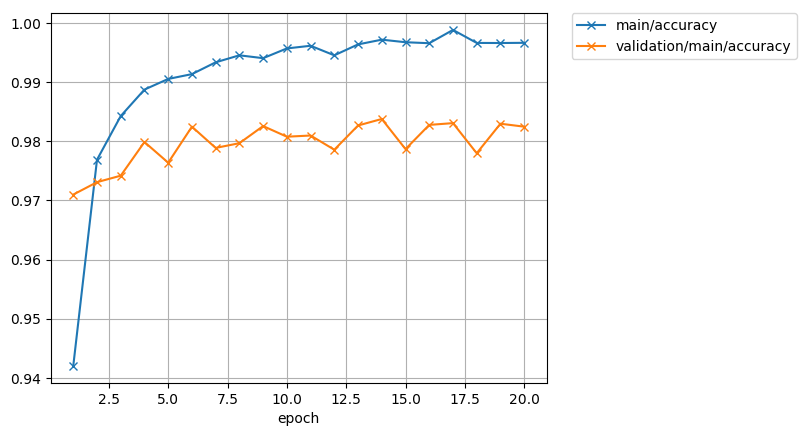

In [12]:
from IPython.display import Image
Image('result/accuracy.png')

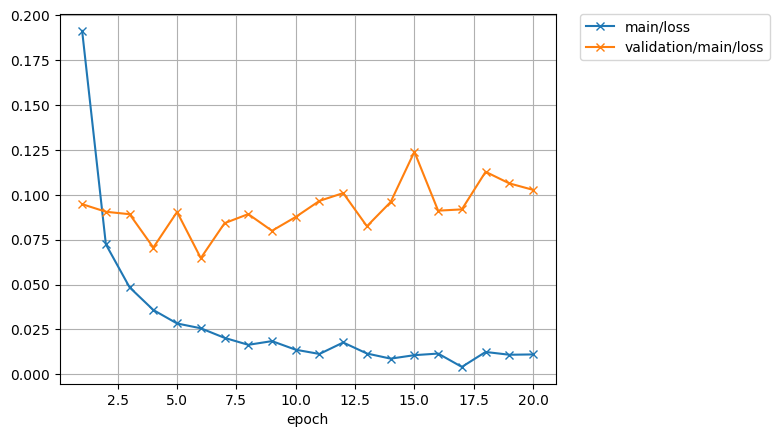

In [13]:
from IPython.display import Image
Image('result/loss.png')

## ニューラルネットの構造を表示

In [14]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('result/cg.dot')
graph.write_png('result/cg.png')
Image(graph.create_png())

ImportError: No module named pydotplus